**First, we'll make sure to upload our data effeciently, as we're using Google Collab**

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Reading the file
uploaded = files.upload()
df = pd.read_csv('food_coded.csv')



Saving food_coded.csv to food_coded.csv


**Checking upload worked**

In [4]:
#Checking columns are exact
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


**Are there any duplicates, or null values, aka; Cleaning Data**

In [5]:
# Checking shape and column generally
print(f"Data Shape: {df.shape}")
df.info()

Data Shape: (125, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null

Checking nulls

In [6]:
# Checking for NaNs
print("Missing values:\n", df.isnull().sum())

Missing values:
 GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64


Checking duplicates

In [7]:
# Checking for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


**Cleaning the data**

In [8]:
# If 'JA' is in data, convert to NaN
df.replace("JA", np.nan, inplace=True)

# Handling missing values
df.fillna(0, inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# Converting columns to correct datatypes
numeric_cols = ['GPA', 'exercise', 'income']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Re-checking the cleaned data above
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           122 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

Making Sure Data Types are Correct, according to their category

In [13]:
# Convert gender column to category

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})

<ipython-input-13-e8d718305050>:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})


Let's see if it worked!

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   GPA                           122 non-null    float64 
 1   Gender                        125 non-null    category
 2   breakfast                     125 non-null    int64   
 3   calories_chicken              125 non-null    int64   
 4   calories_day                  125 non-null    float64 
 5   calories_scone                125 non-null    float64 
 6   coffee                        125 non-null    int64   
 7   comfort_food                  125 non-null    object  
 8   comfort_food_reasons          125 non-null    object  
 9   comfort_food_reasons_coded    125 non-null    float64 
 10  cook                          125 non-null    float64 
 11  comfort_food_reasons_coded.1  125 non-null    int64   
 12  cuisine                       125 non-null    floa

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,0.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.300,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.200,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,0,3,1,1315,"Not sure, 240"
4,3.500,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


**APPROACHING A RESEARCH QUESTION**
**Research Question 1**
 Does Healthy Lifestyle Affect GPA?

Let's start with a bar plot visualization

<ipython-input-11-b39881f3f8f0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(0, inplace=True)
<ipython-input-11-b39881f3f8f0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

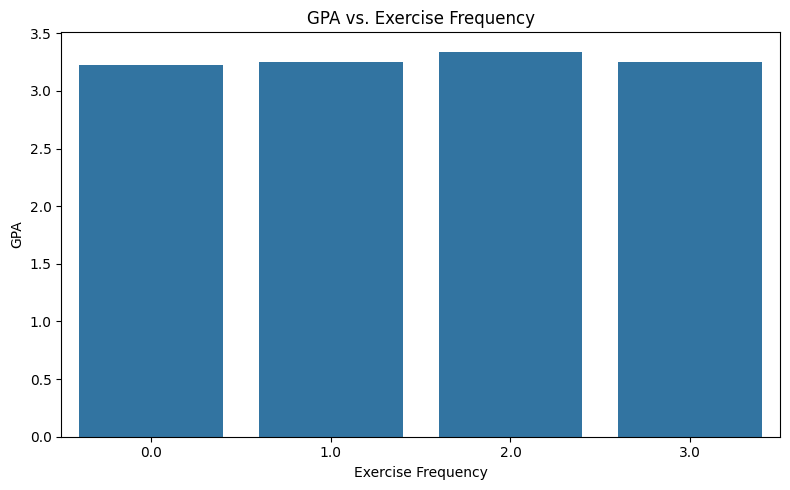

In [11]:
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
df['exercise'] = pd.to_numeric(df['exercise'], errors='coerce')
df['GPA'].fillna(0, inplace=True)
df['exercise'].fillna(0, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='exercise', y='GPA', data=df, errorbar=None)
plt.title('GPA vs. Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('GPA')
plt.tight_layout()
plt.show()


Let's try Connecting GPA & Income, to see if Income is related to GPA?

In [ ]:
# Ensure GPA and Income are numeric
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Fill missing values (Nan) with 0
df['GPA'].fillna(0, inplace=True)
df['income'].fillna(0, inplace=True)

# Bin the Income into ranges, to be grouped
income_bins = [0, 20000, 40000, 60000, 80000, 100000, np.inf]
income_labels = ['<20k', '20k–40k', '40k–60k', '60k–80k', '80k–100k', '100k+']
df['income_bin'] = pd.cut(df['income'], bins=income_bins, labels=income_labels, right=False)

# Calculate correlation matrix
corr = df[['GPA', 'income']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Customize plot
plt.title('Correlation Heatmap between GPA and Income', fontsize=16)

plt.show()





**Another visualization**

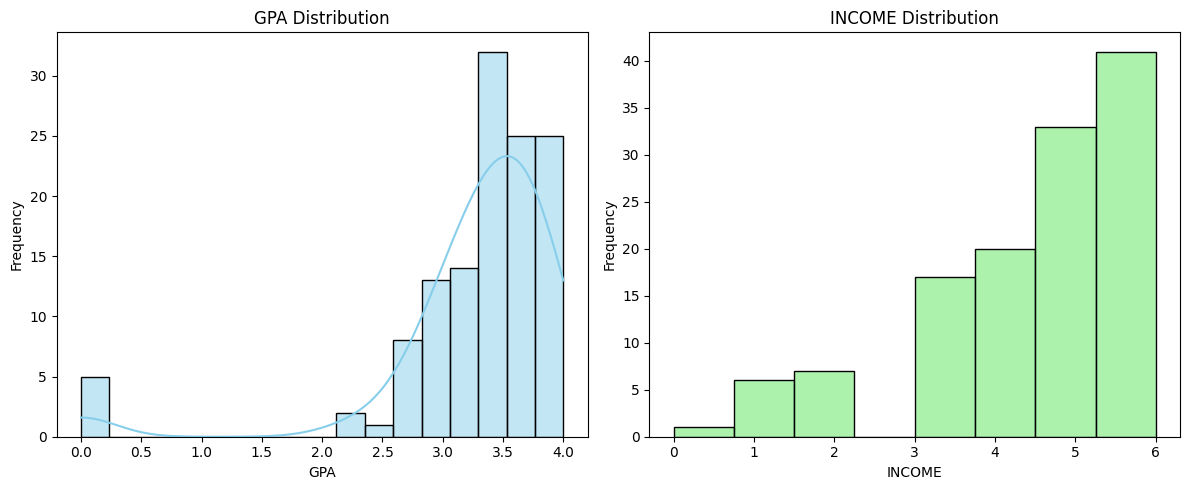

In [20]:
def plot_two_histograms(data, col1, col2):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col1], kde=True, color='skyblue')
    plt.title(f'{col1.upper()} Distribution')
    plt.xlabel(col1.upper())
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data[col2], kde=True, color='lightgreen')
    plt.title(f'{col2.upper()} Distribution')
    plt.xlabel(col2.upper())
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
plot_two_histograms(df, 'GPA', 'income')


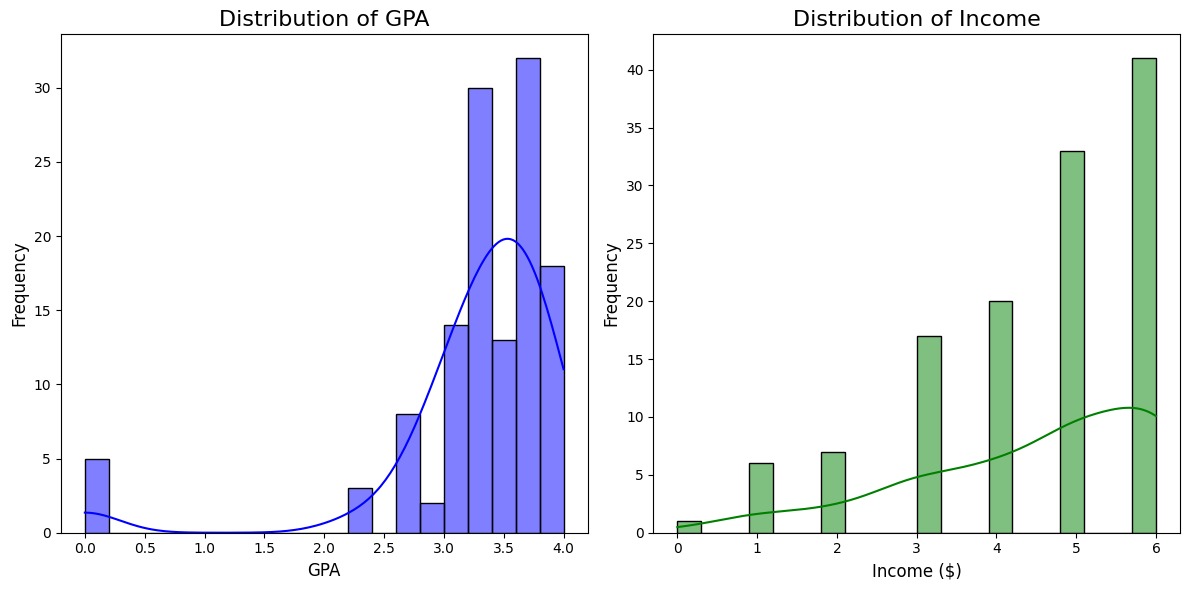

In [14]:
# Plot histograms for GPA and Income
plt.figure(figsize=(12, 6))

# Plot GPA distribution
plt.subplot(1, 2, 1)
sns.histplot(df['GPA'], bins=20, kde=True, color='blue')
plt.title('Distribution of GPA', fontsize=16)
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot Income distribution
plt.subplot(1, 2, 2)
sns.histplot(df['income'], bins=20, kde=True, color='green')
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
df['income']

**Conclusion**:
1. There is a visible relation between GPA & Healthy Lifestyle: students with higher GPAs tend to exercise frequently.
2. GPA and income show a moderate relationship, with GPA slightly increasing in middle-income levels.
3.  GPA may also be related to other factors like eating habits, sleep, or family dynamics for stronger relation.

**RECOMMENDATIONS:**
- Analyze how diet, eating fruit, soda, fast food impacts GPA.
- Include sleep hours,too.
- Conduct analysis including more variables, to get a precise conclusion.

**LIMITATIONS:**
- Missing data replaced with 0 may lead to bias, and thus inaccurate data, affecting the visualizations.
- GPA and exercise are self-reported, which isn't that sufficient.
- We can't generalize results based on certain group, different communities should be addressed.